# K-Nearest Neighbors
In this notebook, we are running the K-Nearest Neighbors algorithm on the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import os

### Import data
Import the small dataset that was created in the Data_Preparation.ipynb file.

In [2]:
df = pd.read_csv('data_folder/small_data.csv', sep=',', 
                       names=['movie', 'user','rating','date'])
df.date = pd.to_datetime(df.date)
df.sort_values(by='date', inplace=True)

### Clean data
Changing the date into separate day, month and year columns

In [3]:
print("Starting...")
df['year'] = pd.to_datetime(df['date']).dt.year
print("Finishing Year...")
df['month'] = pd.to_datetime(df['date']).dt.month
print("Finishing Month...")
df['day'] = pd.to_datetime(df['date']).dt.month
print("Done")

Starting...
Finishing Year...
Finishing Month...
Done


In [4]:
df = df.drop(columns=["date"])

In [5]:
df_small = df.sample(100000)

In [6]:
y = df_small['rating']
X = df_small.drop(columns=['rating'])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Fit Model
Scale the data and then fit the KNN model on the data, display results

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.metrics import mean_squared_error 
from sklearn.neighbors import KNeighborsClassifier
import math

error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(math.sqrt(mean_squared_error(y_test, pred_i)))

Text(0, 0.5, 'RMSE')

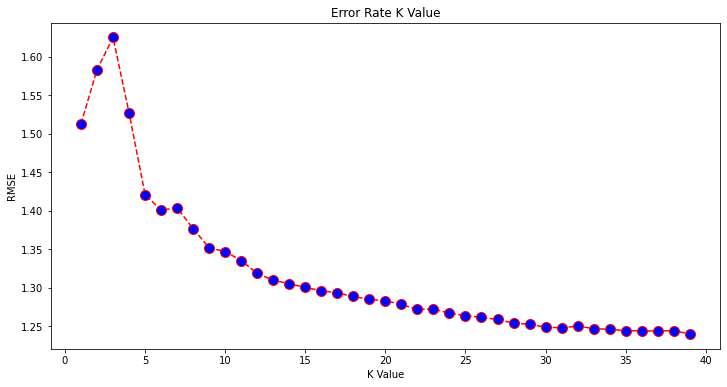

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('RMSE') 

In [12]:
plt.show()